In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def polyModel(x, theta):
    """
    Polynomial model.
    """
    return np.sum([t * x**i for i, t in enumerate(theta)], axis=0)

def polyModelWithNoise(x, theta, sigma):
    """
    Polynomial model with noise.
    """
    y = np.sum([coef * x**i for i, coef in enumerate(theta)], axis=0)
    noise = np.random.normal(0, sigma, len(x))
    return y + noise

def polyGradient(x, theta):
    """
    Gradient of the polynomial model with respect to theta.
    """
    return np.vstack([x**i for i in range(len(theta))])


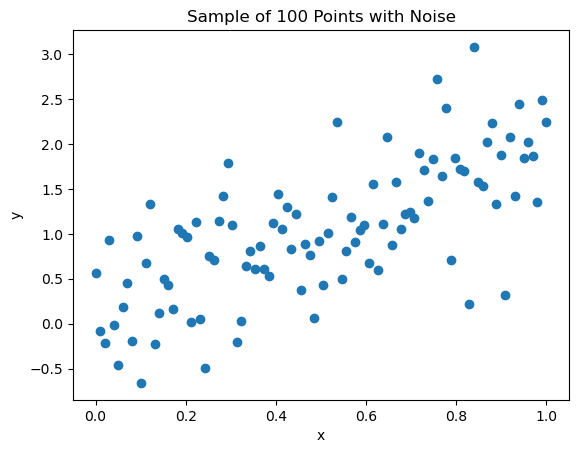

In [ ]:

# Plotting a sample of 100 points
x_sample = np.linspace(0, 1, 100)
y_sample = polyModelWithNoise(x_sample, [0, 2], 0.5)
plt.scatter(x_sample, y_sample)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample of 100 Points with Noise')
plt.show()


In [ ]:

def get_avg_fake_chisq(y_true, y_model):
    """
    Returns the average fake chi-squared.
    """
    return np.average((y_model - y_true)**2)


In [ ]:

# Stochastic Gradient Descent
theta = [-1, 0.5]  # Starting values
eta = 0.5  # Learning rate
numSteps = 100
lossArray = np.zeros(numSteps)

for i in range(numSteps):
    x = np.random.uniform(0, 1, 10)
    y_true = polyModelWithNoise(x, [0, 2], 0.5)
    y_model = np.sum([t * x**i for i, t in enumerate(theta)], axis=0)
    lossArray[i] = get_avg_fake_chisq(y_true, y_model)
    gradients = np.mean((y_model - y_true) * polyGradient(x, theta), axis=1)
    theta -= eta * gradients




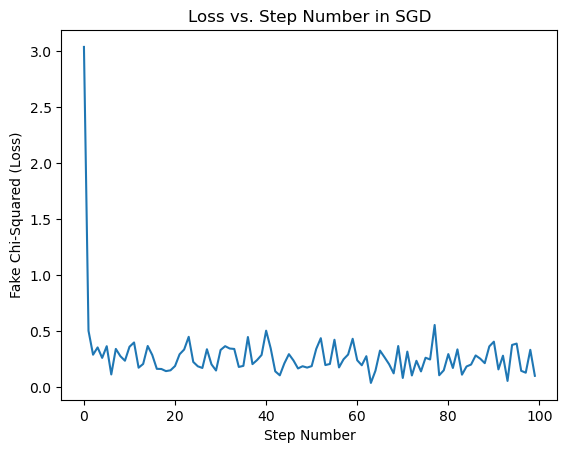

In [ ]:
# Plotting the loss vs. step number
plt.plot(range(numSteps), lossArray)
plt.xlabel('Step Number')
plt.ylabel('Fake Chi-Squared (Loss)')
plt.title('Loss vs. Step Number in SGD')
plt.show()

In [ ]:
# Third-order polynomial data generation
def generate_data(theta, x_range, num_points, sigma):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = polyModelWithNoise(x, theta, sigma)
    return x, y

theta_true = [0, 2, 2, 2]  # True parameters for the third-order polynomial
sigma = 0.5  # Noise standard deviation
x_data, y_data = generate_data(theta_true, [0, 1], 100, sigma)  # Generate data


In [ ]:
def stochastic_gradient_descent(x_data, y_data, poly_order, num_steps, eta, sample_size):
    theta = np.random.randn(poly_order + 1)  # Random initial theta
    for i in range(num_steps):
        indices = np.random.choice(len(x_data), sample_size, replace=False)
        x_sample = x_data[indices]
        y_sample = y_data[indices]
        y_model = polyModel(x_sample, theta)
        gradients = np.mean((y_model - y_sample) * polyGradient(x_sample, theta), axis=1)
        theta -= eta * gradients
    return theta

# Fit models
theta_1st = stochastic_gradient_descent(x_data, y_data, 1, 100, 0.5, 10)
theta_3rd = stochastic_gradient_descent(x_data, y_data, 3, 100, 0.5, 10)
theta_7th = stochastic_gradient_descent(x_data, y_data, 7, 100, 0.5, 10)


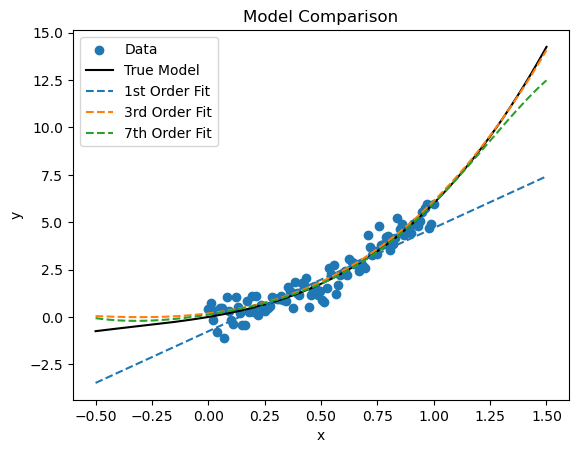

In [ ]:
x_plot = np.linspace(-0.5, 1.5, 200)  # Expanded range for plotting
y_true_plot = polyModel(x_plot, theta_true)
y_1st_plot = polyModel(x_plot, theta_1st)
y_3rd_plot = polyModel(x_plot, theta_3rd)
y_7th_plot = polyModel(x_plot, theta_7th)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_plot, y_true_plot, label='True Model', color='k')
plt.plot(x_plot, y_1st_plot, label='1st Order Fit', linestyle='--')
plt.plot(x_plot, y_3rd_plot, label='3rd Order Fit', linestyle='--')
plt.plot(x_plot, y_7th_plot, label='7th Order Fit', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model Comparison')
plt.show()
